# Convolutional Layer
Details of constructing one conv

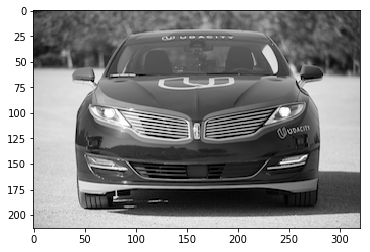

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img_path = "images/udacity_sdc.png"

bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

gray_img = gray_img.astype("float32")/255

plt.imshow(gray_img, cmap="gray")
plt.show();

In [14]:
filter_vals = np.array([[-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1], [-1, -1, 0, 1, 1]])
print("Filter shape: {}" .format(filter_vals.shape))

Filter shape: (5, 5)


In [20]:
# Mixing four different filters

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = np.array([filter_1, filter_2, filter_3, filter_4])

print("Filter 1: {}" .format(filter_1))

Filter 1: [[-1 -1  0  1  1]
 [-1 -1  0  1  1]
 [-1 -1  0  1  1]
 [-1 -1  0  1  1]
 [-1 -1  0  1  1]]


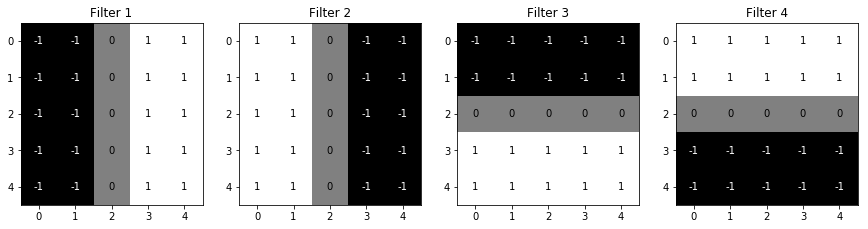

In [50]:
# Visualize all filters
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
(ax1, ax2, ax3, ax4) = axs
for idx, ax in enumerate(axs):
    ax.set_title("Filter {}" .format(idx+1))
    ax.imshow(filters[idx], cmap="gray")
    width, height = filters[idx].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[idx][x][y]),
                        xy = (y, x),
                        horizontalalignment="center",
                        verticalalignment="center",
                        color="white" if filters[idx][x][y] < 0 else "black")



# Define a convolutional layer

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of conv layer to be the weights from the filters in last cell
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
    
    def forward(self, x):
        # Calculates the output of a conv layer
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        return conv_x, activated_x
    
# Instantiate the model
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), bias=False)
)


# Visualize output of filters

In [53]:
# Helper function
def viz_filter(layer, n_filters=4):
    fig = plt.figure(figsize=(15, 10))
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap="gray")
        ax.set_title("Output: {}".format(i+1))

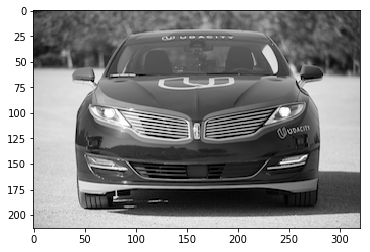

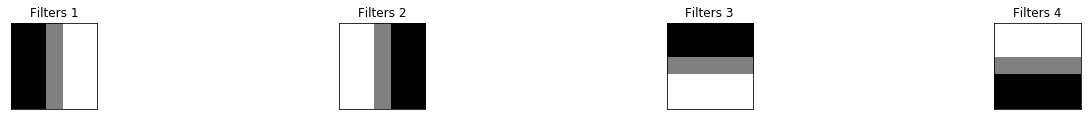

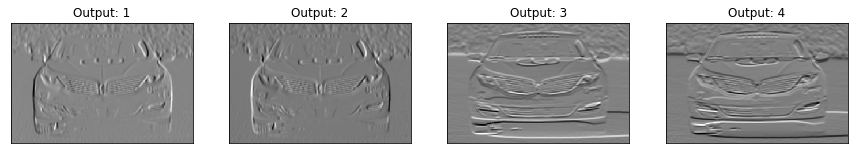

In [54]:
plt.imshow(gray_img, cmap="gray")

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap="gray")
    ax.set_title("Filters {}" .format(i+1))
    
# Convert the image into input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# Get the conv layer
conv_layer, activated_layer = model(gray_img_tensor)

viz_filter(conv_layer)

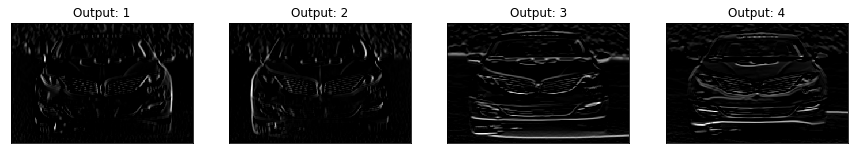

In [55]:
# After relu is applied, visualiize the output of an activated conv layer
viz_filter(activated_layer)